# Importing libraries

In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
import skimage.io

%matplotlib notebook

# Importing and visualizing data

In [2]:
data_dict = load_digits()
X = data_dict.data
images = data_dict.images
y = data_dict.target

<IPython.core.display.Javascript object>


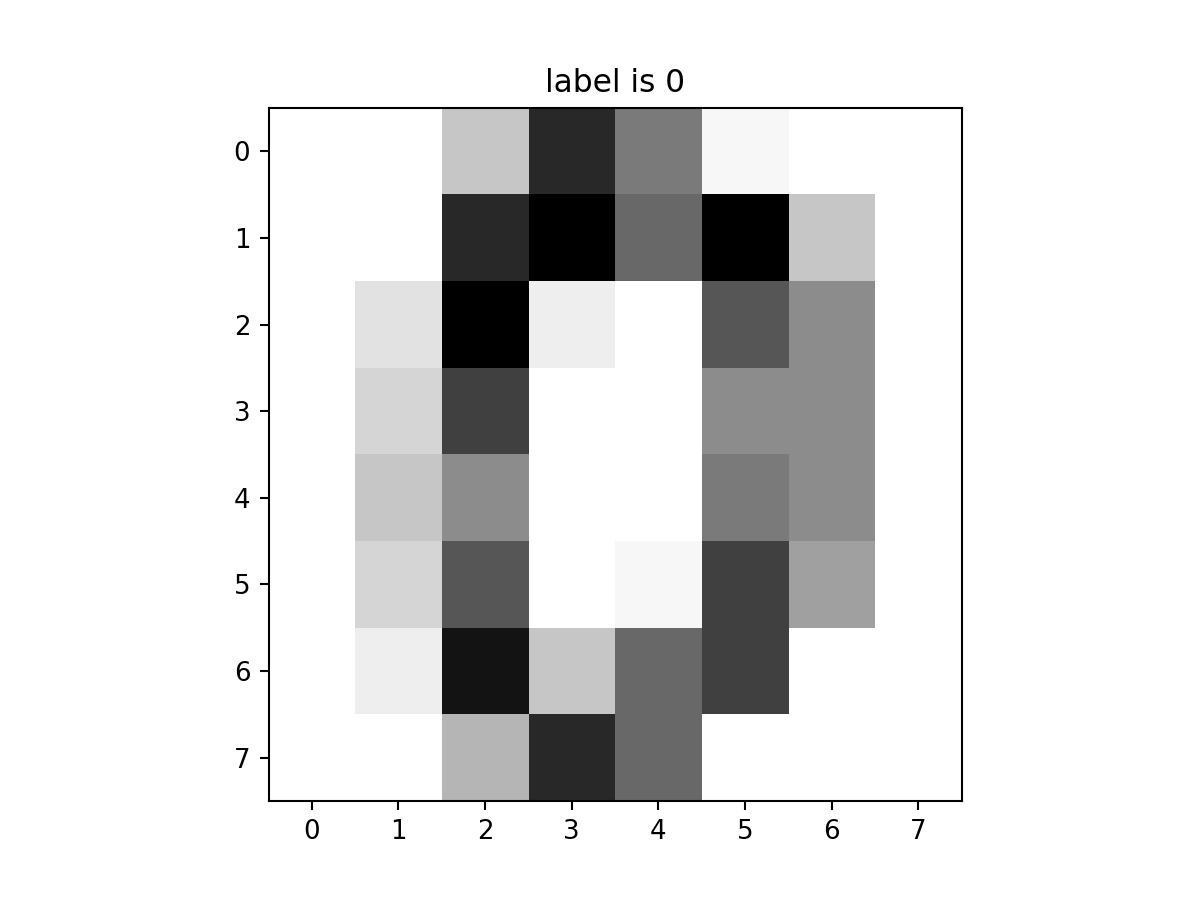

Text(0.5, 1.0, 'label is 0')

In [3]:
plt.figure(1)
i = 0
plt.imshow(images[i], cmap = 'Greys')
plt.title("label is {}".format(i))

# Splitting data

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 360, random_state = 10)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size = 360, random_state = 10)

# Model training

In [5]:
######### Checking C values #############

for c in [0.01, 0.1, 1, 10, 100]:
    logistic1_model = LogisticRegression(max_iter = 2500, C = c, random_state = 10).fit(Xtrain,ytrain)
    pred_train = logistic1_model.predict(Xtrain)
    pred_val = logistic1_model.predict(Xval)
    print('Training accuracy:{}'.format(np.mean(pred_train == ytrain)) , end = '\t')
    print('Validation accuracy:{}'.format(np.mean(pred_val == yval)))

Training accuracy:0.9935004642525533	Validation accuracy:0.9861111111111112
Training accuracy:1.0	Validation accuracy:0.9861111111111112
Training accuracy:1.0	Validation accuracy:0.9805555555555555
Training accuracy:1.0	Validation accuracy:0.9777777777777777
Training accuracy:1.0	Validation accuracy:0.9777777777777777


# Final model

In [6]:
logistic_model = LogisticRegression(max_iter = 2500, C = 0.1, random_state = 10).fit(Xtrain, ytrain)  
# max_iter is 2500 for ensuring convergence of solver

pred_train = logistic_model.predict(Xtrain)
pred_val = logistic_model.predict(Xval)
print('Training accuracy:{}'.format(np.mean(pred_train == ytrain)) , end = '\t')
print('Validation accuracy:{}'.format(np.mean(pred_val == yval)))

Training accuracy:1.0	Validation accuracy:0.9861111111111112


In [7]:
confusion_matrix(yval, pred_val)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 42,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 21,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 36]], dtype=int64)

# Test accuracy

In [8]:
pred_test = logistic_model.predict(Xtest)
print('Testing accuracy:{}'.format(np.mean(pred_test == ytest)))

Testing accuracy:0.9722222222222222


# my image

In [9]:
plt.figure(2)
my_8x8 = np.array([[0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 1, 1, 0, 0, 0, 0],
                   [0, 1, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 1, 1, 1, 0, 0, 0]])
#my_8x8 = images[y==4][20]
my_8x8 = 1 - skimage.io.imread("two8x8.png", as_gray = True)

plt.imshow(my_8x8*40, cmap = 'Greys')

<IPython.core.display.Javascript object>

FileNotFoundError: No such file: 'D:\projects\MNIST_dig_reg\two8x8.png'

In [20]:
logistic_model.predict(my_8x8.reshape(1,-1))

array([4])